<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Histogram**


Estimated time needed: **45** minutes


In this lab, you will focus on the visualization of data. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


In this lab, you will perform the following:


- Visualize the distribution of data using histograms.

- Visualize relationships between features.

- Explore data composition and comparisons.


## Demo: Working with database


#### Download the database file.


In [1]:
!wget -O survey-data.sqlite https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite

--2025-04-27 19:59:52--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 211415040 (202M) [application/octet-stream]
Saving to: ‘survey-data.sqlite’

survey-data.sqlite  100%[===================>] 201.62M  62.2MB/s    in 3.2s    

2025-04-27 19:59:56 (62.3 MB/s) - ‘survey-data.sqlite’ saved [211415040/211415040]



#### Install the required libraries and import them


In [2]:
!pip install pandas

In [3]:
!pip install matplotlib

In [4]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

#### Connect to the SQLite database


In [5]:
conn = sqlite3.connect('survey-data.sqlite')

## Demo: Basic SQL queries

**Demo 1: Count the number of rows in the table**


In [6]:
QUERY = "SELECT COUNT(*) FROM main"
df = pd.read_sql_query(QUERY, conn)
print(df)


   COUNT(*)
0     65437


**Demo 2: List all tables**


In [7]:
QUERY = """
SELECT name as Table_Name 
FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


**Demo 3: Group data by age**


In [ ]:
QUERY = """
SELECT Age, COUNT(*) as count 
FROM main 
GROUP BY Age 
ORDER BY Age
"""
df_age = pd.read_sql_query(QUERY, conn)
print(df_age)


## Hands-on Lab: Visualizing Data with Histograms


### 1. Visualizing the distribution of data (Histograms)


**1.1 Histogram of `CompTotal` (Total Compensation)**


Objective: Plot a histogram of `CompTotal` to visualize the distribution of respondents' total compensation.


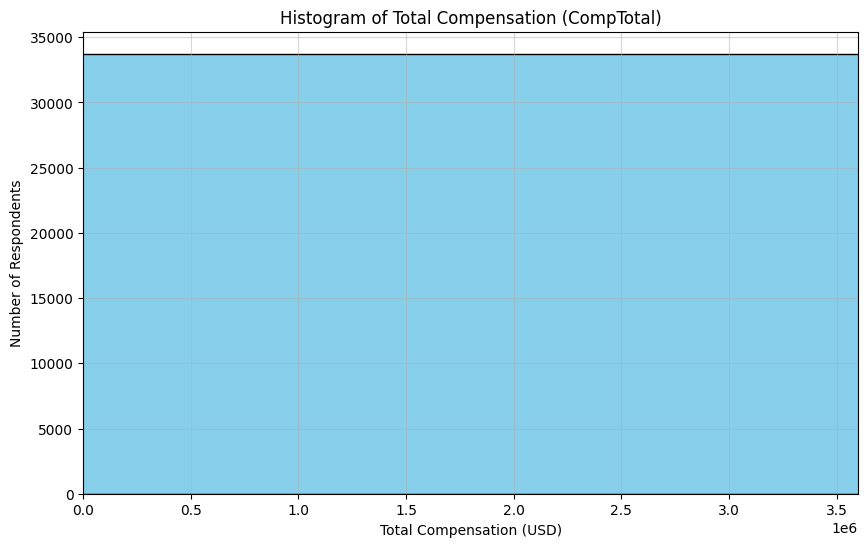

In [8]:
## Write your code here
# Query CompTotal from the database
QUERY = """
SELECT CompTotal
FROM main
"""
df_comp = pd.read_sql_query(QUERY, conn)

# Drop missing values
df_comp = df_comp.dropna()

# Plot histogram
plt.figure(figsize=(10,6))
plt.hist(df_comp['CompTotal'], bins=50, color='skyblue', edgecolor='black')
plt.title('Histogram of Total Compensation (CompTotal)')
plt.xlabel('Total Compensation (USD)')
plt.ylabel('Number of Respondents')
plt.grid(True, alpha=0.5)
plt.xlim(0, df_comp['CompTotal'].quantile(0.95))  # Limit x-axis to 95th percentile to avoid extreme outliers
plt.show()


**1.2 Histogram of YearsCodePro (Years of Professional Coding Experience)**


Objective: Plot a histogram of `YearsCodePro` to analyze the distribution of coding experience among respondents.


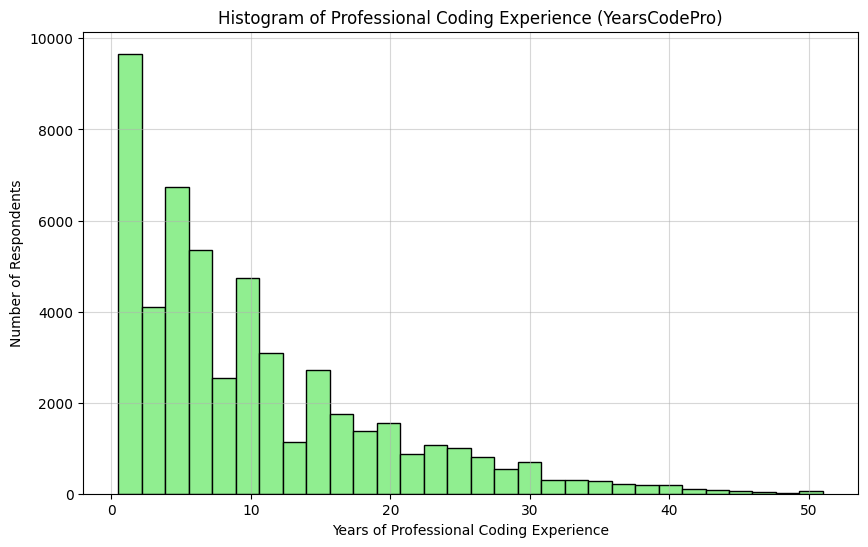

In [9]:
## Write your code here
# Query YearsCodePro from the database
QUERY = """
SELECT YearsCodePro
FROM main
"""
df_years = pd.read_sql_query(QUERY, conn)

# Drop missing values
df_years = df_years.dropna()

# Some values might be text like "Less than 1 year" or "More than 50 years"
# We'll map them to numeric values
def clean_years(value):
    if value == 'Less than 1 year':
        return 0.5
    elif value == 'More than 50 years':
        return 51
    else:
        try:
            return float(value)
        except:
            return None

df_years['YearsCodeProClean'] = df_years['YearsCodePro'].apply(clean_years)

# Drop any rows that couldn't be converted
df_years = df_years.dropna(subset=['YearsCodeProClean'])

# Plot histogram
plt.figure(figsize=(10,6))
plt.hist(df_years['YearsCodeProClean'], bins=30, color='lightgreen', edgecolor='black')
plt.title('Histogram of Professional Coding Experience (YearsCodePro)')
plt.xlabel('Years of Professional Coding Experience')
plt.ylabel('Number of Respondents')
plt.grid(True, alpha=0.5)
plt.show()


### 2. Visualizing Relationships in Data


**2.1 Histogram Comparison of `CompTotal` by `Age` Group**


Objective: Use histograms to compare the distribution of CompTotal across different Age groups.


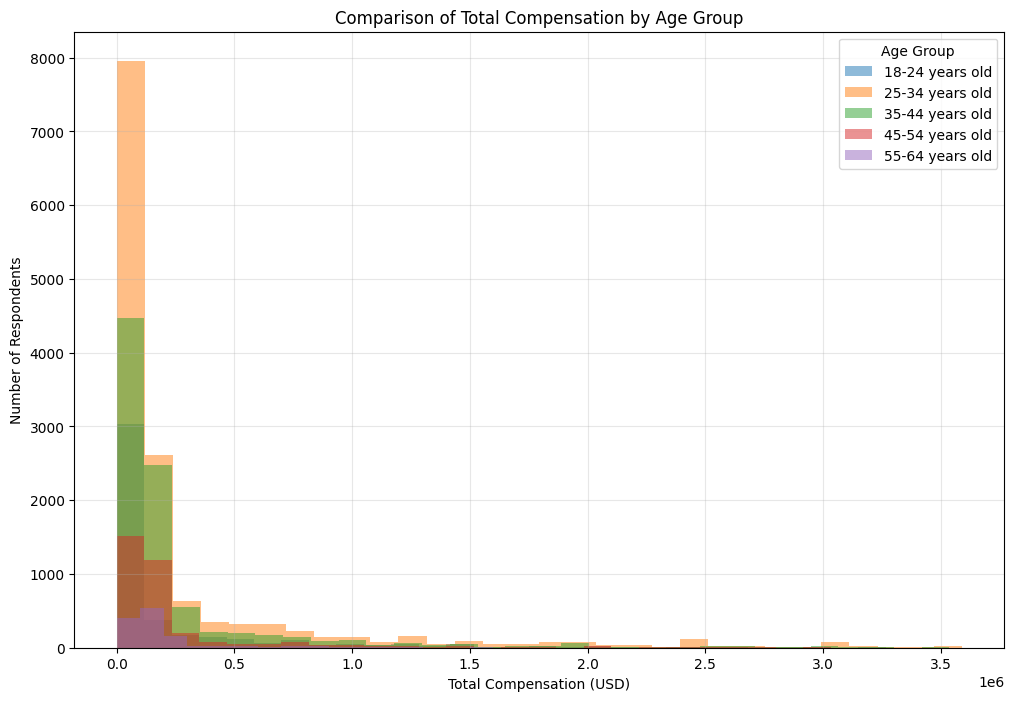

In [10]:
## Write your code here
# Query Age and CompTotal
QUERY = """
SELECT Age, CompTotal
FROM main
"""
df_age_comp = pd.read_sql_query(QUERY, conn)

# Drop missing values
df_age_comp = df_age_comp.dropna()

# Focus only on reasonable CompTotal (trim huge outliers)
df_age_comp = df_age_comp[df_age_comp['CompTotal'] < df_age_comp['CompTotal'].quantile(0.95)]

# List unique Age groups
age_groups = df_age_comp['Age'].dropna().unique()

# Choose a few major age groups for clearer plotting (you can adjust this list)
selected_age_groups = ['18-24 years old', '25-34 years old', '35-44 years old', '45-54 years old', '55-64 years old']

# Set up the plot
plt.figure(figsize=(12,8))

# Plot histogram for each age group
for age_group in selected_age_groups:
    group_data = df_age_comp[df_age_comp['Age'] == age_group]['CompTotal']
    plt.hist(group_data, bins=30, alpha=0.5, label=age_group)

# Plot settings
plt.title('Comparison of Total Compensation by Age Group')
plt.xlabel('Total Compensation (USD)')
plt.ylabel('Number of Respondents')
plt.legend(title='Age Group')
plt.grid(True, alpha=0.3)
plt.show()


**2.2 Histogram of TimeSearching for Different Age Groups**


Objective: Use histograms to explore the distribution of `TimeSearching` (time spent searching for information) for respondents across different age groups.


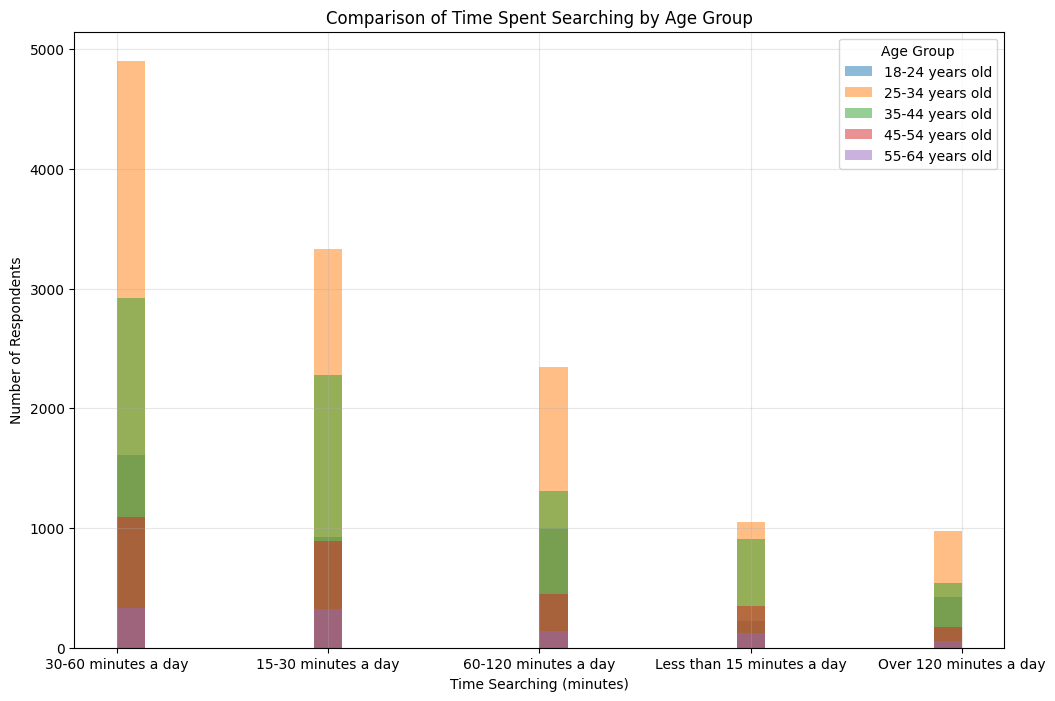

In [11]:
## Write your code here
# Query Age and TimeSearching
QUERY = """
SELECT Age, TimeSearching
FROM main
"""
df_age_time = pd.read_sql_query(QUERY, conn)

# Drop missing values
df_age_time = df_age_time.dropna()

# List unique Age groups
age_groups = df_age_time['Age'].dropna().unique()

# Focus on a few major age groups for clearer plotting
selected_age_groups = ['18-24 years old', '25-34 years old', '35-44 years old', '45-54 years old', '55-64 years old']

# Set up the plot
plt.figure(figsize=(12,8))

# Plot histogram for each age group
for age_group in selected_age_groups:
    group_data = df_age_time[df_age_time['Age'] == age_group]['TimeSearching']
    plt.hist(group_data, bins=30, alpha=0.5, label=age_group)

# Plot settings
plt.title('Comparison of Time Spent Searching by Age Group')
plt.xlabel('Time Searching (minutes)')
plt.ylabel('Number of Respondents')
plt.legend(title='Age Group')
plt.grid(True, alpha=0.3)
plt.show()


### 3. Visualizing the Composition of Data


**3.1 Histogram of Most Desired Databases (`DatabaseWantToWorkWith`)**


Objective: Visualize the most desired databases for future learning using a histogram of the top 5 databases.


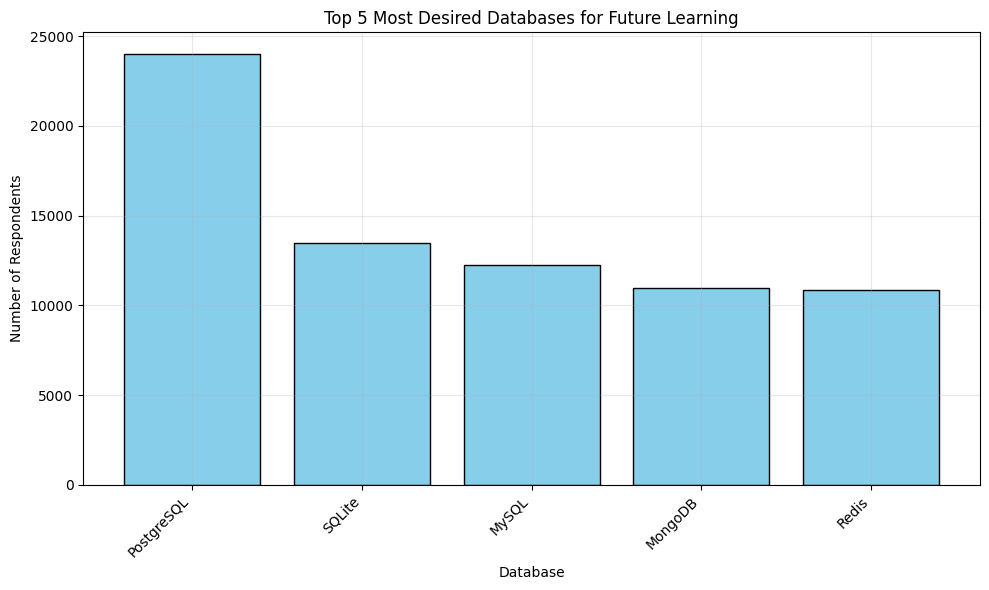

In [12]:
## Write your code here
# Query the DatabaseWantToWorkWith column
QUERY = """
SELECT DatabaseWantToWorkWith
FROM main
"""
df_db = pd.read_sql_query(QUERY, conn)

# Drop missing values
df_db = df_db.dropna()

# Split multiple entries into individual rows
all_databases = df_db['DatabaseWantToWorkWith'].str.split(';').explode()

# Remove leading/trailing whitespace
all_databases = all_databases.str.strip()

# Count frequency of each database
database_counts = all_databases.value_counts()

# Get the top 5 most desired databases
top5_databases = database_counts.head(5)

# Plot the histogram
plt.figure(figsize=(10,6))
plt.bar(top5_databases.index, top5_databases.values, color='skyblue', edgecolor='black')
plt.title('Top 5 Most Desired Databases for Future Learning')
plt.xlabel('Database')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


**3.2 Histogram of Preferred Work Locations (`RemoteWork`)**


Objective: Use a histogram to explore the distribution of preferred work arrangements (`remote work`).


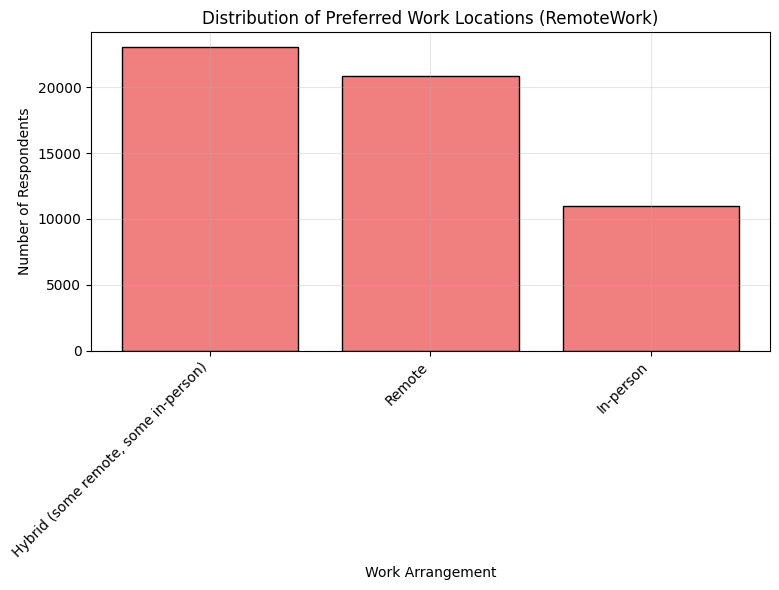

In [13]:
## Write your code here
# Query RemoteWork column
QUERY = """
SELECT RemoteWork
FROM main
"""
df_remote = pd.read_sql_query(QUERY, conn)

# Drop missing values
df_remote = df_remote.dropna()

# Count occurrences of each work preference
remote_counts = df_remote['RemoteWork'].value_counts()

# Plot the histogram
plt.figure(figsize=(8,6))
plt.bar(remote_counts.index, remote_counts.values, color='lightcoral', edgecolor='black')
plt.title('Distribution of Preferred Work Locations (RemoteWork)')
plt.xlabel('Work Arrangement')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


### 4. Visualizing Comparison of Data


**4.1 Histogram of Median CompTotal for Ages 45 to 60**


Objective: Plot the histogram for `CompTotal` within the age group 45 to 60 to analyze compensation distribution among mid-career respondents.


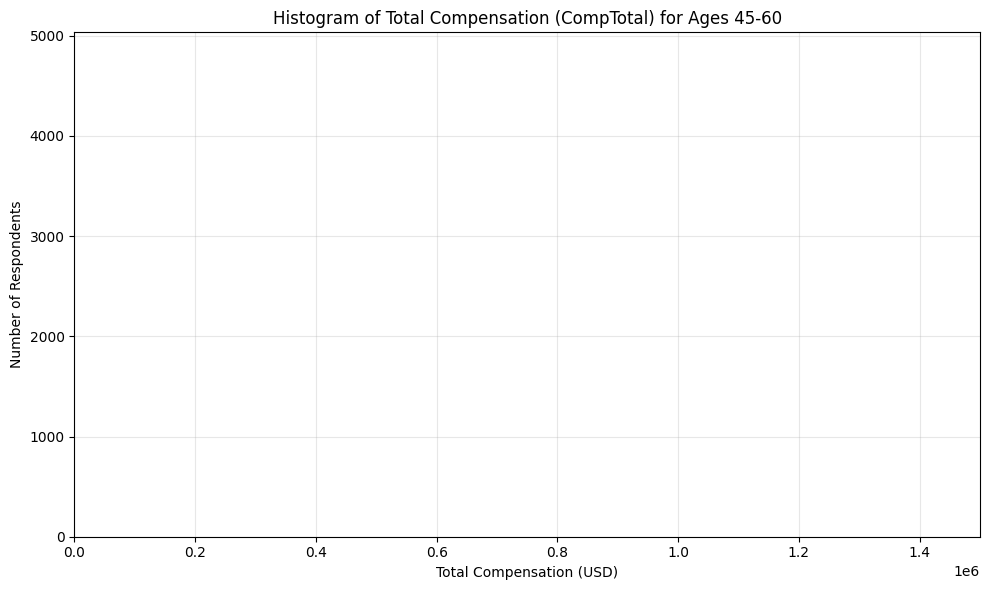

In [14]:
## Write your code here
# Query Age and CompTotal for filtering
QUERY = """
SELECT Age, CompTotal
FROM main
WHERE Age BETWEEN '45-54 years old' AND '55-64 years old'
"""
df_age_comp = pd.read_sql_query(QUERY, conn)

# Drop missing values
df_age_comp = df_age_comp.dropna()

# Filter the data for ages 45 to 60 (both inclusive)
df_age_comp['Age'] = df_age_comp['Age'].astype(str)
df_age_comp = df_age_comp[df_age_comp['Age'].isin(['45-54 years old', '55-64 years old'])]

# Plot histogram for the CompTotal in this age range
plt.figure(figsize=(10,6))
plt.hist(df_age_comp['CompTotal'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Total Compensation (CompTotal) for Ages 45-60')
plt.xlabel('Total Compensation (USD)')
plt.ylabel('Number of Respondents')
plt.grid(True, alpha=0.3)
plt.xlim(0, df_age_comp['CompTotal'].quantile(0.95))  # Trim extreme outliers
plt.tight_layout()
plt.show()


**4.2 Histogram of Job Satisfaction (`JobSat`) by YearsCodePro**


Objective: Plot the histogram for `JobSat` scores based on respondents' years of professional coding experience.


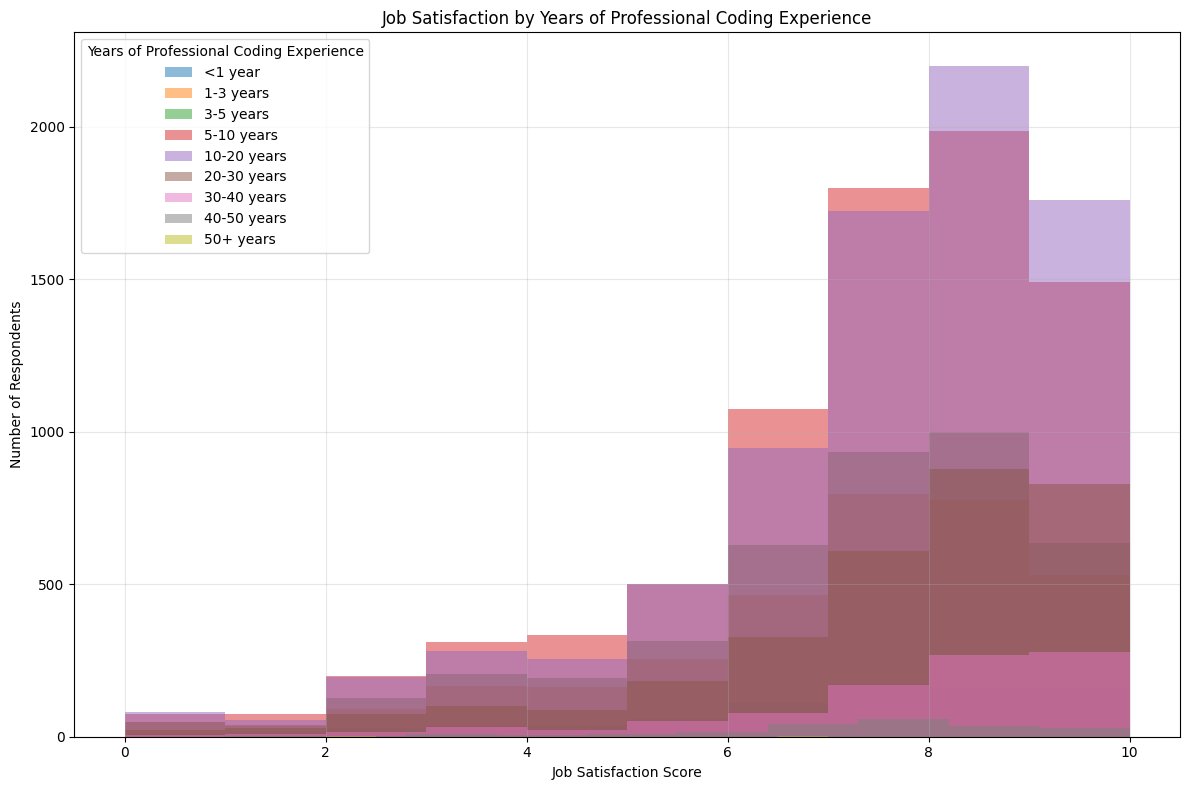

In [15]:
## Write your code here
# Query JobSat and YearsCodePro from the database
QUERY = """
SELECT JobSat, YearsCodePro
FROM main
"""
df_job_sat = pd.read_sql_query(QUERY, conn)

# Drop missing values
df_job_sat = df_job_sat.dropna()

# Convert YearsCodePro to numeric (handling text like 'Less than 1 year')
def clean_years(value):
    if value == 'Less than 1 year':
        return 0.5
    elif value == 'More than 50 years':
        return 51
    else:
        try:
            return float(value)
        except:
            return None

df_job_sat['YearsCodeProClean'] = df_job_sat['YearsCodePro'].apply(clean_years)

# Drop rows where YearsCodePro could not be converted
df_job_sat = df_job_sat.dropna(subset=['YearsCodeProClean'])

# Plot histograms for JobSat grouped by YearsCodePro ranges
plt.figure(figsize=(12,8))

# Group data by years of experience and plot histograms for JobSat
experience_groups = [0, 1, 3, 5, 10, 20, 30, 40, 50, 51]  # Define experience ranges
labels = ['<1 year', '1-3 years', '3-5 years', '5-10 years', '10-20 years', '20-30 years', '30-40 years', '40-50 years', '50+ years']

for i in range(len(experience_groups)-1):
    group_data = df_job_sat[(df_job_sat['YearsCodeProClean'] >= experience_groups[i]) & 
                            (df_job_sat['YearsCodeProClean'] < experience_groups[i+1])]
    plt.hist(group_data['JobSat'], bins=10, alpha=0.5, label=labels[i])

# Plot settings
plt.title('Job Satisfaction by Years of Professional Coding Experience')
plt.xlabel('Job Satisfaction Score')
plt.ylabel('Number of Respondents')
plt.legend(title='Years of Professional Coding Experience')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


### Final step: Close the database connection


Once you've completed the lab, make sure to close the connection to the SQLite database:



In [16]:
conn.close()

### Summary


In this lab, you used histograms to visualize various aspects of the dataset, focusing on:

- Distribution of compensation, coding experience, and work hours.

- Relationships in compensation across age groups and work status.

- Composition of data by desired databases and work environments.

- Comparisons of job satisfaction across years of experience.

Histograms helped reveal patterns and distributions in the data, enhancing your understanding of developer demographics and preferences.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
